# Use Case Summary
- Objective Statement:
  - To gain insight into sales fluctuations per year.
  - To gain insight into the revenue earned per year and month.
  - To find out how long it's been since a customer ordering.
  - To gain insight about how often a customer orders.
  - To find out how much money customers spend on ordering goods.
  - To get insight about customer segmentation analysis.

- Challenges:
  - Large size of data, cannot maintain by excel spreadsheet.
  - There are inappropriate data types.

- Methodology / Analytic Technique:
  - Descriptive Analysis.
  - Graph Analysis.
  - Segment Analysis using Recency Frequency Monetary (RFM) Modelling

- Business Benefit:
  - Knowing sales performance every year so, it can be a reference for future decision making.
  - Helping Business Development Team to create product differentiation based on the characteristic for each customer.
  - Knowing how to treat customer with specific criteria.

- Expected Outcome:
  - Find out how sales fluctuate per year.
  - Find out how much revenue per year and per month.
  - Find out how long it's been since the customer ordered.
  - Find out how often customers orders.
  - Find out how much the customer spends when orders.
  - Know customer segmentation analysis.
  
# Business Understanding
- Retail is the sale of goods from a business to a consumer for their own use. A retail transaction handles small quantities of goods whereas wholesale deals with the purchasing of goods on a large scale.
- This case has some business question using the data:
  - How sales fluctuate per year?
  - How much revenue per year and per month?
  - How long it's been since the customer ordered?
  - How often customers orders?
  - How much the customer spends when orders?
  - How about customer segmentation analysis?
  
# Data Understanding
- Data of Customer order with 4 columns and 5009 rows
- This data from 04/01/2011 to 31/12/2014
- Source Code : https://www.kaggle.com/datasets/siddinho/sample-orders-dataset-retail
- Data Dictionary :
  - order_date : Customer order date 
  - order_id : Customer order unique Id
  - customer : Customer name
  - grand_total : Total cost from customers order

# Data Preparation
Code Used:
- Python Version: 3.7.15
- Packages: Pandas, Numpy, Matplotlib, Seaborn, Datetime, Plotly and Warnings



# Data Profiling

Import package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm


import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

Load and preview dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_orders.csv to data_orders.csv


Load and preview dataset

In [ ]:
df = pd.read_csv('data_orders.csv')
df.head()

,order_date,order_id,customer,grand_total
0,9/7/2011,CA-2011-100006,Dennis Kane,378
1,7/8/2011,CA-2011-100090,Ed Braxton,699
2,3/14/2011,CA-2011-100293,Neil Franzšsisch,91
3,1/29/2011,CA-2011-100328,Jasper Cacioppo,4
4,4/8/2011,CA-2011-100363,Jim Mitchum,21


Info dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_date   5009 non-null   object
 1   order_id     5009 non-null   object
 2   customer     5009 non-null   object
 3   grand_total  5009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 156.7+ KB


Check missing value

In [ ]:
df.isna().sum()

order_date     0
order_id       0
customer       0
grand_total    0
dtype: int64

Describe dataset

In [ ]:
df.describe()

,grand_total
count,5009.000000
mean,458.626672
std,954.729307
min,1.000000
25%,38.000000
50%,152.000000
75%,512.000000
max,23661.000000


Based on the table above, the **average revenue** in 2011-2014 was **458.6 dollars** with the **smallest revenue of 1 dollar** and the **most at 23661 dollars**. Probably, there are customers who get a discount so that there is an income of 1 dollar.

# Data Cleansing

In [ ]:
# Order date

df['order_date'] = pd.to_datetime(df['order_date'])
df['OrderYearMonth'] = df['order_date'].map(lambda date: 100*date.year + date.month)
df['Date'] = df['order_date'].dt.strftime('%Y-%m')
df['Year'] = df['order_date'].dt.strftime('%Y')
df['Month'] = df['order_date'].dt.strftime('%m')

# Exploratory Data Analysis

In [ ]:
# Aggregating the Orders by Year and Month

df_agg = df.groupby(["Year", "Date"]).order_id.count()
df_agg.head()

Year  Date   
2011  2011-01    31
      2011-02    29
      2011-03    71
      2011-04    66
      2011-05    69
Name: order_id, dtype: int64

In [ ]:
# Converting series to datafarme and resetting index

df_agg = pd.DataFrame(df_agg)
df_agg = df_agg.reset_index()
df_agg.head()

,Year,Date,order_id
0,2011,2011-01,31
1,2011,2011-02,29
2,2011,2011-03,71
3,2011,2011-04,66
4,2011,2011-05,69


In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

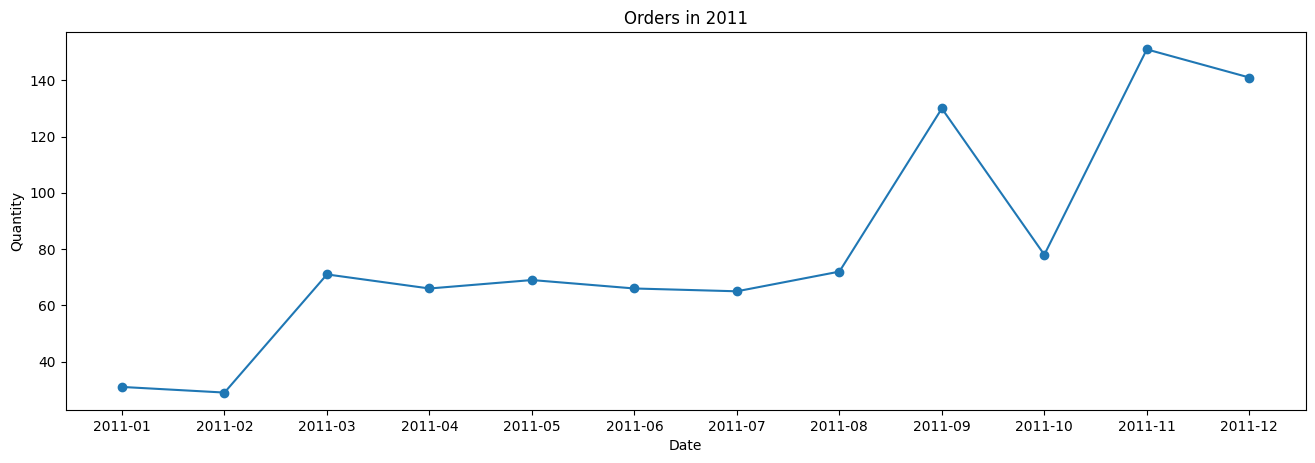

In [ ]:
plot_df(df_agg.query("Year == '2011'"), x=df_agg.query("Year == '2011'").Date, y=df_agg.query("Year == '2011'").order_id, title='Orders in 2011')

The number of items purchased tends to **increase every year**. In **October** sales **declined sharply** but **increased again** in the following month, even exceeding sales in September. As for sales in **December** experienced **decline again**.

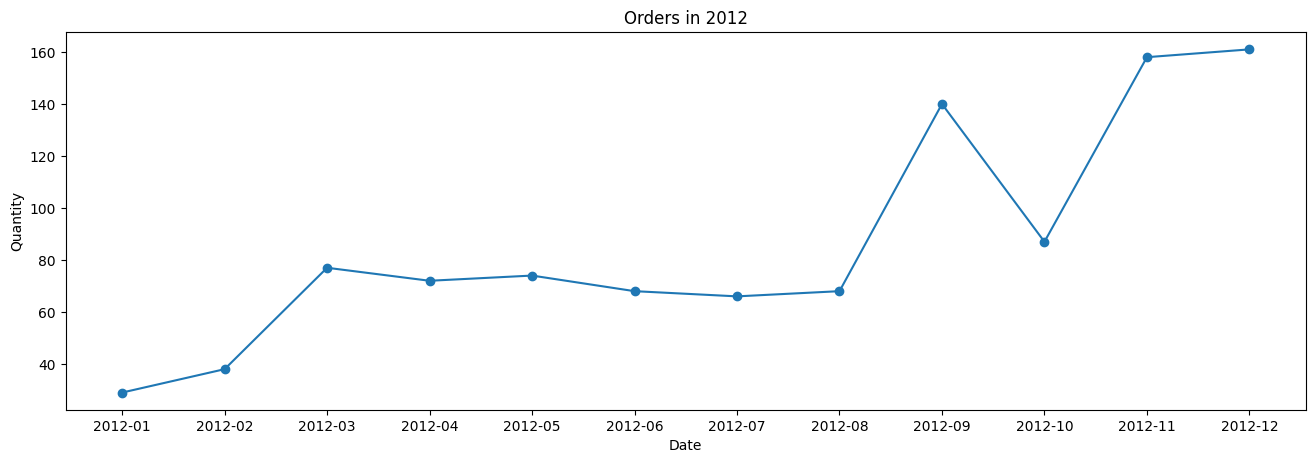

In [ ]:
plot_df(df_agg.query("Year == '2012'"), x=df_agg.query("Year == '2012'").Date, y=df_agg.query("Year == '2012'").order_id, title='Orders in 2012')

The number of items purchased tends to **increase** every month, in **February 
to March** there is a sharp increase about **2 times**. In **September** there was a **sharp increase**. However, in the following month, **October, there was a sharp decline**. However, in **November** there was a high increase even higher than in September and again **increased** sales in **December**

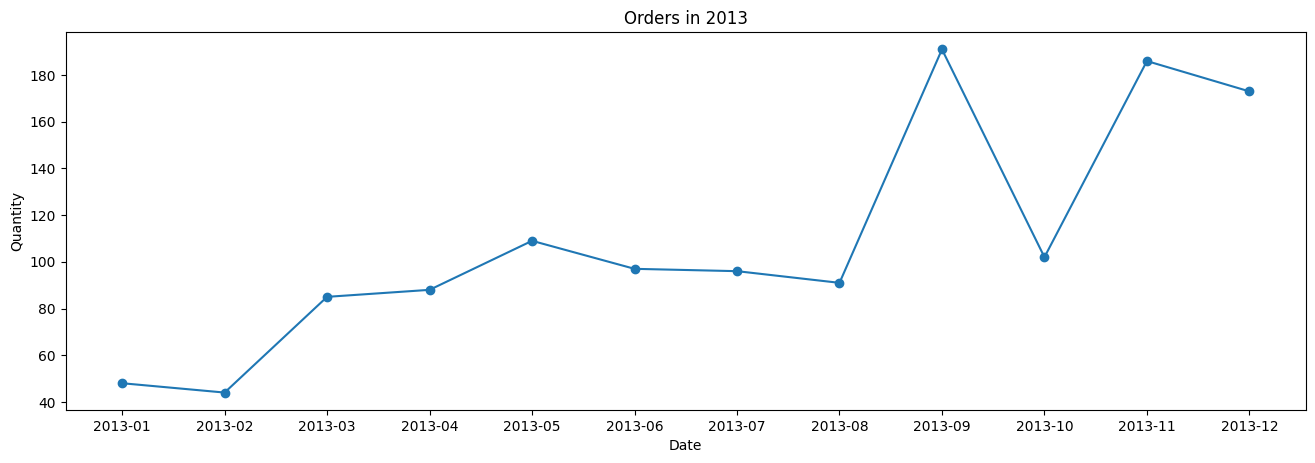

In [ ]:
plot_df(df_agg.query("Year == '2013'"), x=df_agg.query("Year == '2013'").Date, y=df_agg.query("Year == '2013'").order_id, title='Orders in 2013')

The number of items purchased tends to **increase** every month, in **February to March** there is a sharp increase to **almost 2 times**. In **September** there was a **sharp increase**. However, in the following month, **October, there was a sharp decline**. However, in **November** there was a **high** increase in the number of goods purchased and returned **decreased slightly** sales in **December**.

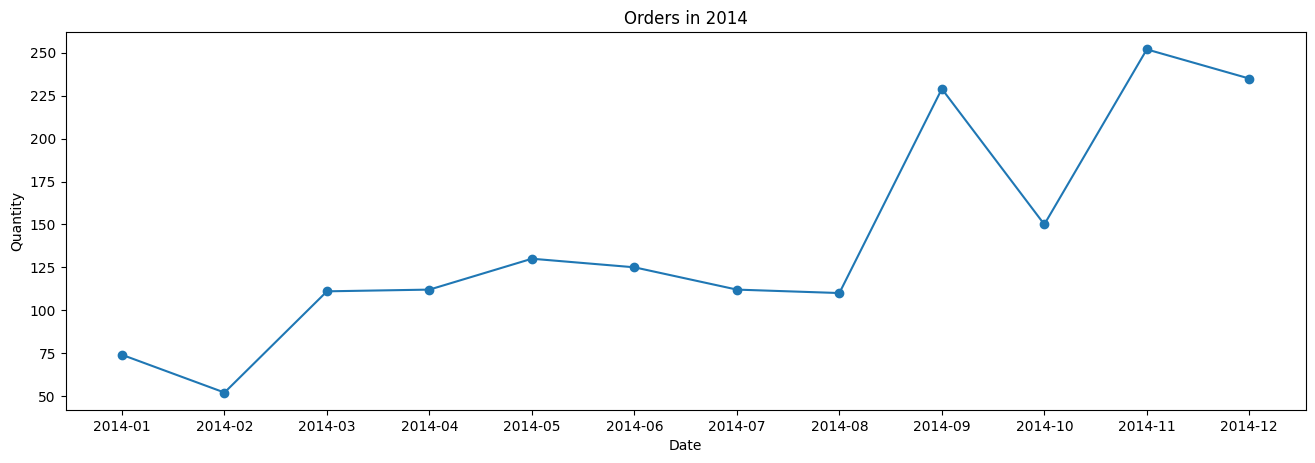

In [ ]:
plot_df(df_agg.query("Year == '2014'"), x=df_agg.query("Year == '2014'").Date, y=df_agg.query("Year == '2014'").order_id, title='Orders in 2014')

The number of items purchased tends to **increase** every month, in **February to March** there is a sharp increase to **almost 2 times**. In September there was a sharp increase. However, in the following month, **October, there was a sharp decline**. However, in **November, there was a high increase** in the number of goods purchased even **higher than in September** and again **decreased slightly** sales in **December**

In [ ]:
# Monthly Order in 2011-2014

df_order = df.groupby(['Year','Month'])['order_id'].count().reset_index()
df_order.head()

,Year,Month,order_id
0,2011,01,31
1,2011,02,29
2,2011,03,71
3,2011,04,66
4,2011,05,69


In [ ]:
df_order['Month'][df_order['Month']=='01'] ='Jan'
df_order['Month'][df_order['Month']=='02'] ='Feb'
df_order['Month'][df_order['Month']=='03'] ='Mar'
df_order['Month'][df_order['Month']=='04'] ='Apr'
df_order['Month'][df_order['Month']=='05'] ='May'
df_order['Month'][df_order['Month']=='06'] ='Jun'
df_order['Month'][df_order['Month']=='07'] ='Jul'
df_order['Month'][df_order['Month']=='08'] ='Aug'
df_order['Month'][df_order['Month']=='09'] ='Sep'
df_order['Month'][df_order['Month']=='10'] ='Oct'
df_order['Month'][df_order['Month']=='11'] ='Nov'
df_order['Month'][df_order['Month']=='12'] ='Dec'

In [ ]:
fig = px.line(df_order, x='Month', y='order_id', color='Year', symbol="Year", title='Monthly Order')
fig.show()

Based on the chart above, product sales always **increased** in September and November in 2011-2014. Meanwhile, there was always a fairly **sharp decreased** in October in 2011-2014.

In [ ]:
# Annual Revenue

df_revenue = df.groupby(['Year'])['grand_total'].sum().reset_index()
df_revenue.head()

,Year,grand_total
0,2011,484260
1,2012,470539
2,2013,608477
3,2014,733985


In [ ]:
n = len(df_revenue.Year)-1
df_revenue['Increase/Decrease'] = df_revenue['grand_total']
while n >= 0:
  df_revenue['Increase/Decrease'].iloc[n] = round((df_revenue['grand_total'].iloc[n]-df_revenue['grand_total'].iloc[n-1])*100/df_revenue['grand_total'].iloc[n-1],2)
  if n == 0:
    df_revenue['Increase/Decrease'].iloc[n] = 0 
  n-=1

In [ ]:
df_revenue.head()

,Year,grand_total,Increase/Decrease
0,2011,484260,0.00
1,2012,470539,-2.83
2,2013,608477,29.31
3,2014,733985,20.63


In [ ]:
plot_data = [
    go.Scatter(
        x=df_revenue['Year'],
        y=df_revenue['grand_total'],
        mode='lines+markers'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Annual Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Based on the chart above, revenue in 2011 amounted to 484.26K dollars and in 2012 it was 470,539K dollars. This means that there was a **decrease** in revenue from 2011 to 2012 by 2.83%. Meanwhile, from 2013 to 2014, revenue continued to increase. When viewed quantitatively, the increase in revenue from 2012 to 2013 was **29.3%**. From 2013 to 2014, revenue increased by **20.6%**.

In [ ]:
# Monthly Revenue

df_revenue = df.groupby(['Year','Month'])['grand_total'].sum().reset_index()
df_revenue.head()

,Year,Month,grand_total
0,2011,01,13949
1,2011,02,4810
2,2011,03,55695
3,2011,04,28298
4,2011,05,23647


In [ ]:
df_revenue['Month'][df_revenue['Month']=='01'] ='Jan'
df_revenue['Month'][df_revenue['Month']=='02'] ='Feb'
df_revenue['Month'][df_revenue['Month']=='03'] ='Mar'
df_revenue['Month'][df_revenue['Month']=='04'] ='Apr'
df_revenue['Month'][df_revenue['Month']=='05'] ='May'
df_revenue['Month'][df_revenue['Month']=='06'] ='Jun'
df_revenue['Month'][df_revenue['Month']=='07'] ='Jul'
df_revenue['Month'][df_revenue['Month']=='08'] ='Aug'
df_revenue['Month'][df_revenue['Month']=='09'] ='Sep'
df_revenue['Month'][df_revenue['Month']=='10'] ='Oct'
df_revenue['Month'][df_revenue['Month']=='11'] ='Nov'
df_revenue['Month'][df_revenue['Month']=='12'] ='Dec'

In [ ]:
fig = px.line(df_revenue, x='Month', y='grand_total', color='Year', symbol="Year", title='Monthly Revenue')
fig.show()

Based on the chart above, monthly revenue from 2011-2014 is seasonal because in certain months there is an increase and decrease. In September and November in 2011-2014 there was **always a fairly high increase** in income, this may be due to the **high demand** for products for the Halloween and Christmas celebration.

# Preprocessing Modeling

# RFM Analysis

Recency Frequency Monetary (RFM)

RFM analysis allows you to segment customers by the frequency and value of purchases and identify those customers who append the most money.

Recency - how long it's been since a customer bought something from us.

Frequency - how often a customer buys from us

Monetary value - the total value of purchases a customer has made.

In [ ]:
# Timebound

print(df['order_date'].min())
print(df['order_date'].max())

2011-01-04 00:00:00
2014-12-31 00:00:00


In [ ]:
NOW = dt.date(2014,12,31)
df['Date'] = pd.DatetimeIndex(df.order_date).date

In [ ]:
# Recency

df_recency = df.groupby(['customer'],as_index=False)['Date'].max()
df_recency.columns = ['Customer','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,Customer,Recency
0,Aaron Bergman,415
1,Aaron Hawkins,12
2,Aaron Smayling,88
3,Adam Bellavance,54
4,Adam Hart,34


In [ ]:
# Frequency - Monetary

FM_Table = df.groupby('customer').agg({'order_id':lambda x:len(x),
                                        'grand_total':lambda x:x.sum()})
FM_Table.rename(columns = {'order_id' :'Frequency',
                           'grand_total':'Monetary'},inplace= True)
FM_Table.head()

,Frequency,Monetary
customer,,
Aaron Bergman,3,887
Aaron Hawkins,7,1744
Aaron Smayling,7,3050
Adam Bellavance,8,7756
Adam Hart,10,3249


In [ ]:
RFM_Table = df_recency.merge(FM_Table,left_on='Customer',right_on='customer')
RFM_Table.head()

,Customer,Recency,Frequency,Monetary
0,Aaron Bergman,415,3,887
1,Aaron Hawkins,12,7,1744
2,Aaron Smayling,88,7,3050
3,Adam Bellavance,54,8,7756
4,Adam Hart,34,10,3249


# Modeling

- We will assign a score from 1 to 4 to each Recency, Frequency and Monetary respectively.
- 1 is the highest value and 4 is the lowest value for the RScore
- 4 is the highest value and 1 is the lowest value for the FMScore


In [ ]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [ ]:
segmented_rfm = RFM_Table.copy()

In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,Customer,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,Aaron Bergman,415,3,887,4,4,4
1,Aaron Hawkins,12,7,1744,1,2,3
2,Aaron Smayling,88,7,3050,3,2,2
3,Adam Bellavance,54,8,7756,2,2,1
4,Adam Hart,34,10,3249,2,1,2


In [ ]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [ ]:
segmented_rfm.head()

,Customer,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,Aaron Bergman,415,3,887,4,4,4,444
1,Aaron Hawkins,12,7,1744,1,2,3,123
2,Aaron Smayling,88,7,3050,3,2,2,322
3,Adam Bellavance,54,8,7756,2,2,1,221
4,Adam Hart,34,10,3249,2,1,2,212


In [ ]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile', 'F_quartile', 'M_quartile']].sum(axis=1)

In [ ]:
segmented_rfm.head()

,Customer,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,Aaron Bergman,415,3,887,4,4,4,444,12
1,Aaron Hawkins,12,7,1744,1,2,3,123,6
2,Aaron Smayling,88,7,3050,3,2,2,322,7
3,Adam Bellavance,54,8,7756,2,2,1,221,5
4,Adam Hart,34,10,3249,2,1,2,212,5


# Label

In [ ]:
print("Best Customers: ", len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print("Loyal Customers: ", len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ", len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print("Almost Lost: ", len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print("Lost Customers: ", len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print("Lost Cheap Customers: ", len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  30
Loyal Customers:  159
Big Spenders:  198
Almost Lost:  2
Lost Customers:  31
Lost Cheap Customers:  67


In [ ]:
# Setting up the label for each client and adding the column "Label" to the dataframe

label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):
    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"
    elif segmented_rfm['RFM_Segment'][i] == '134':
        label[i] = "Almost Lost"
    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = "Lost Customers"
    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"
    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"
    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"
    else:
        label[i] = "Others"

In [ ]:
# Adding the 'Label' column to our dataframe

segmented_rfm['Label'] = label

In [ ]:
# Count the frequency that a value occurs in a dataframe column for the labels.

segmented_rfm['Label'].value_counts()

Others                  409
Loyal Customers         129
Big Spenders            125
Lost Cheap Customers     67
Lost Customers           31
Best Customers           30
Almost Lost               2
Name: Label, dtype: int64

In [ ]:
percent = pd.DataFrame(round(segmented_rfm.Label.value_counts()*100/segmented_rfm.Label.count(),2))
percent = percent.rename(columns={'Label':'Percent'})
percent.head(7)

,Percent
Others,51.58
Loyal Customers,16.27
Big Spenders,15.76
Lost Cheap Customers,8.45
Lost Customers,3.91
Best Customers,3.78
Almost Lost,0.25


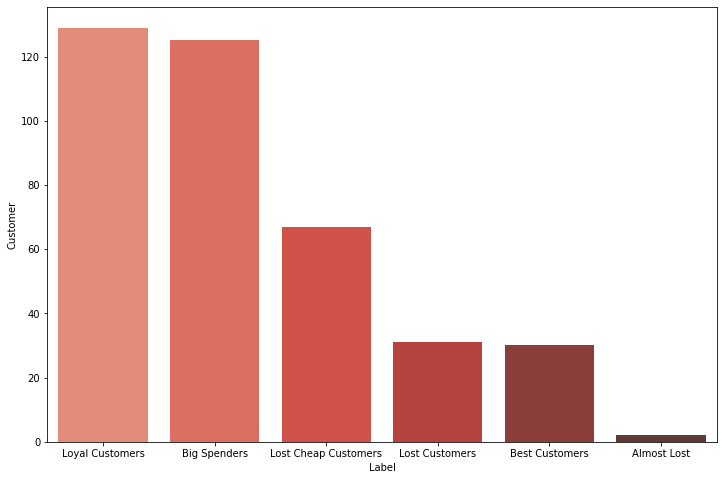

In [ ]:
sq1=segmented_rfm.groupby('Label')['Customer'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sq1.drop([0],inplace=True)
sns.barplot(data=sq1, x="Label", y="Customer", palette = "Reds_d");

Based on the graph above, there are 6 segmentations of customers using RFM modeling. The **Loyal Customers** segmentation has the **highest** percentage of **16.27%** of total customers. Followed by **Big Spenders** with a percentage amount of **15.76%**, **Lost Cheap Customers** with a percentage amount of **8.45%**, **Lost Customers** with a percentage amount of **3.91%**, **Best Customers** with a percentage amount of **3.78%**, Then **Almost Customers** with a percentage amount of **0.25%**.

# Result

- In 2011, The number of items purchased tends to **increase every year**. In **October** sales **declined sharply** but **increased again** in the following month, even exceeding sales in September. As for sales in **December** experienced **decline again**.
- In 2012,The number of items purchased tends to **increase** every month, in **February to March** there is a sharp increase about **2 times**. In **September** there was a **sharp increase**. However, in the following month, **October, there was a sharp decline**. However, in **November** there was a high increase even higher than in September and again **increased** sales in **December**.
- In 2013, The number of items purchased tends to **increase** every month, in **February to March** there is a sharp increase to **almost 2 times**. In **September** there was a **sharp increase**. However, in the following month, **October, there was a sharp decline**. However, in **November** there was a **high** increase in the number of goods purchased and returned **decreased slightly** sales in **December**.
- In 2014, The number of items purchased tends to **increase** every month, in **February to March** there is a sharp increase to **almost 2 times**. In September there was a sharp increase. However, in the following month, **October, there was a sharp decline**. However, in **November, there was a high increase** in the number of goods purchased even **higher than in September** and again **decreased slightly** sales in **December**.
- Product sales always **increased** in September and November in 2011-2014. Meanwhile, there was **always a fairly sharp decreased** in October in 2011-2014.
- Based on the chart **Annual Revenue**, revenue in 2011 amounted to 484.26K dollars and in 2012 it was 470,539K dollars. This means that there was a **decrease** in revenue from 2011 to 2012 by 2.83%. Meanwhile, from 2013 to 2014, revenue continued to increase. When viewed quantitatively, the increase in revenue from 2012 to 2013 was **29.3%**. From 2013 to 2014, revenue increased by **20.6%**.
- Based on the chart **Monthly Revenue**, monthly revenue from 2011-2014 is seasonal because in certain months there is an increase and decrease. In September in 2011-2014 there was always a fairly high increase in income, this may be due to the high demand for products for the feast day.

# Recommendation


- Recommendations for increased orders in a given month such as September and November: focus on increasing the amount of production of goods because in certain months such as September and November will receive high demand.
- Recommendations for a decrease orders in a given month such as October: focus on improving marketing strategy so that customers will orders in that month. It can also be by optimizing sales such as multiplying products in October with Halloween celebrations or give points to increase customer purchasing power by giving vouchers or other gifts. The company also can hold an event or sale that smells of Valentine's Day in February to increase sales for that month.
- Recommendations for "Loyal Customers" segment: The company must optimize the campaign for this customer segment in order to maintain their loyalty. It can also give additional points for customer loyalty.
- Recommendations for "Big Spenders" segment: focus on offering other products, especially products that match customer interests or products that are often sought after. Can also offer products with a high price range.
- Recommendations for "Lost Cheap Customers" segment: focus on activating customers and making repurchases by forming a Reactivation Strategy. One of them is by offering products that have been purchased.
- Recommendations for "Lost Customers" segment: focus on activating customers and making repurchases by forming a Reactivation Strategy. One of them is by offering products that have been purchased.
- Recommendations for "Best Customers" segment: focus on increasing customer purchases therefore it is necessary to form a Cross Selling or Up Selling Strategy by offering other products that can be complementary to frequently purchased products.
- Recommendations for "Almost Lost" segment: focus on activating customers and making repurchases by forming a Reactivation Strategy. One of them is by offering products that have been purchased.
